# Regresión Lineal Simple

In [21]:
# realizar la importación y configuración

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston # boston data set is part of sklearn
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
# plt.style.use('ggplot') # emulate pretty r-style plots


### Ejemplo en Econometría:
La variable de respuesta
y = Consumo
x = Nivel de ingresos

y = a + b*x


##  Regresión Lineal Simple

Los datos Boston son parte del módulo `sklearn`. Este conjunto de datos registra `medv` (mediana de los valores de las casas) para 506 vecindarios alrededor de Boston. Buscamos predeccir `medv` usando 13 predictores, tales como `rm` (número promedio de cuartos por casa), `age` (edad promedio de las casas), and `lstat` (porcentaje de hogares con estatus socioeconómico bajo).

In [22]:
# Caga de los datos de Boston
boston = load_boston()

In [23]:
boston.data.shape

(506, 13)

In [25]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
#help(np.column_stack)

In [5]:
#Transformamos los datos en un dataframe para el análisis

# combinamos los predictores y las respuestas para un dataframe
predictors = boston.data
response = boston.target
boston_data = np.column_stack([predictors,response])

# ahora obtenemos los nombres de las columnas del dataframe
col_names = np.append(boston.feature_names, 'MEDV')

# creamos el data frame
boston_df = pd.DataFrame(boston_data, columns = col_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Comenzaremos usando el módulo `statsmodels` para ajustar un modelo de regresión lineal simple, con `medv` como la respuesta y `lstat` como el predictor. La sintaxis básica es `smf.ols('y~x', data)`, donde `y` es la respuesta, `x` el predictor, y `data` es el conjunto de datos en el cual estas dos variables están contenidas.

In [7]:
lm_fit = smf.ols('MEDV~LSTAT', boston_df).fit()
#MEDV = a + b*LSTAT

Para imprimir información acerca del modelo, usamos el método `summary()`. Este nos da p-valores y errores estándar para los ceificientes, así como el estadístico $R^2$ y el estadístico F para el modelo.

In [8]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           5.08e-88
Time:                        16:23:00   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos tener acceso a muchos de estos valroes directamente, por ejemplo, para obtener una lista de parámetros:

In [9]:
lm_fit.params

Intercept    34.553841
LSTAT        -0.950049
dtype: float64

Con el objetivo de obtener un intervalo de confianza del  95% para los estimadores de los coeficientes, podemos usar el método `conf_int()`.

In [10]:
lm_fit.conf_int(alpha=0.05)

,0,1
Intercept,33.448457,35.659225
LSTAT,-1.026148,-0.873951


The fitted values of the model are stored in

In [11]:
lm_fit.fittedvalues

0      29.822595
1      25.870390
2      30.725142
3      31.760696
4      29.490078
         ...    
501    25.366864
502    25.927393
503    29.195563
504    28.397521
505    27.067452
Length: 506, dtype: float64

El módulo `statsmodels` se puede usar para producir intervalos de confianza y predicción para la predicción de `medv` para un valor dado de `lstat` (predicciones).

In [12]:
predictors = pd.DataFrame({'LSTAT':[5,10,15]})
predictions = lm_fit.get_prediction(predictors)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


Por ejemplo, el intervalo de confianza de 95 % asociado con un valor de lstat de 10 es (24.47, 25.63), y el intervalo de predicción del 95 % es (12.828, 37.28). Como se esperaría, el intervalo de confianza y el de predicción están centrados alrededor del mismo punto (un valor predicho de 25.05 para medv cuando lstat es igual a 10), pero estos últimos son sustancialmente más amplos.

Ahora, vamos a graficar medv y lstat junto con la recta de regresión de mínimos cuadrados usando la función plot().

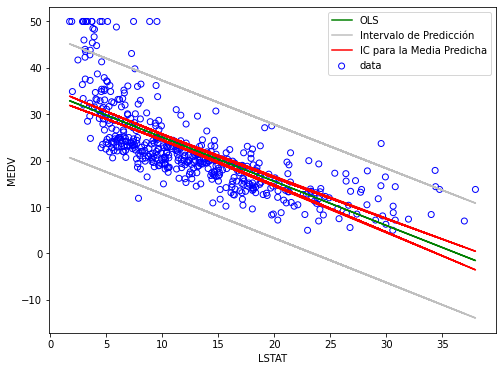

In [13]:
# Crea un gráfico para los datos, el estimador OLS, y los intervalos de predicción y confianza
fig, ax = plt.subplots(figsize=(8,6))

# se obtienen arregos de tipo numpy a partir del dataframe
x = boston_df.LSTAT

# Gráfico de los datos
ax.scatter(x, boston_df.MEDV, facecolors='none', edgecolors='b', label="data")
# gráfico de los valores ajustados del modelo
ax.plot(x, lm_fit.fittedvalues, 'g', label="OLS")

# Para graficar los intervalos de predicción y confianza necesitamos predicciones para todos los puntos de datos
predictions = lm_fit.get_prediction(boston_df).summary_frame(alpha=0.05)

# graficamos los intervalos de predicción superior e inferior
ax.plot(x, predictions.obs_ci_lower, color='0.75', label="Intervalo de Predicción")
ax.plot(x, predictions.obs_ci_upper, color='0.75', label="")

# graficamos los intervalos de confianza superior e inferior
ax.plot(x, predictions.mean_ci_lower, color='r',label="IC para la Media Predicha")
ax.plot(x, predictions.mean_ci_upper, color='r', label="")

ax.legend(loc='best');

plt.xlabel('LSTAT');
plt.ylabel('MEDV');

Next we examine some diagnostic plots, several of which were discussed in Section 3.3.3. Three important diagnostic plots are implemented below:

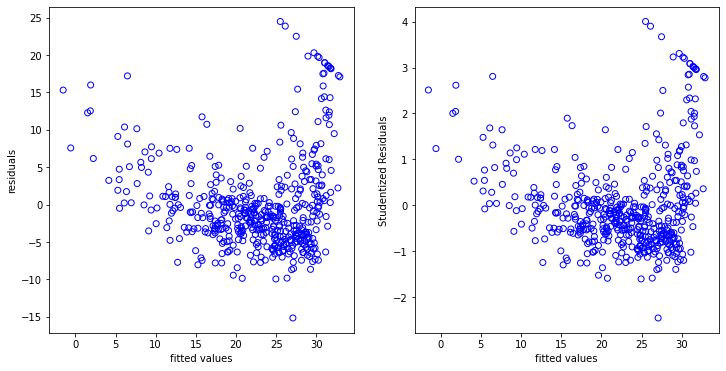

In [14]:
# We need this for leverage and studentized residuilas calculations.
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(lm_fit)
leverage = influence.hat_matrix_diag
stud_res = influence.resid_studentized_external

# Create plots of residuals
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

# Plot the residual for each fitted value
ax1.scatter(lm_fit.fittedvalues, lm_fit.resid, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
# The residual plot indicates significant nonlinearity (a u-shape pattern is clear)

# Plot the studentized residuals
ax2.scatter(lm_fit.fittedvalues, stud_res, facecolors='none', edgecolors='b');
ax2.set_ylabel('Studentized Residuals');
ax2.set_xlabel('fitted values');

# |studentized residual| > 3 are generally considered outliers

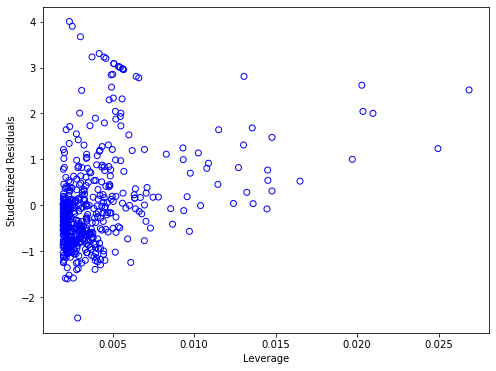

In [15]:
# We can also examine the leverages to identify points that may alter the regression line

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leverage, stud_res,facecolors='none', edgecolors='b');
ax.set_xlabel('Leverage');
ax.set_ylabel('Studentized Residuals');

To asses the normality of the residuals we can use a Normal Probability plot.

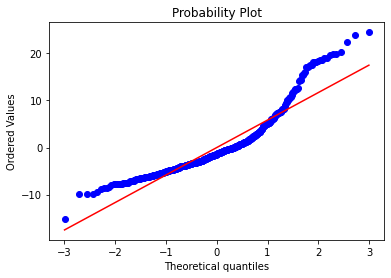

In [16]:
from scipy.stats import probplot

_ = probplot(lm_fit.resid, plot=plt)